# 1. Introduction and Data Overview
This project explores the Heart Disease UCI dataset to identify key predictors and build models to predict the presence of heart disease. The dataset contains 918 observations and 12 primary variables, including demographic information (Age, Sex), health indicators (Cholesterol, RestingBP), and ECG test results. The target variable is HeartDisease, a binary label indicating whether a person has heart disease (1) or not (0). Categorical variables such as ChestPainType, RestingECG, and ExerciseAngina are encoded to prepare the dataset for modeling. Through a step-by-step workflow, we are analyzing patterns, build machine learning models, to evaluate their performance.

In [1]:
# Loading Raw Data and Importing All Required Packages
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")

# Scikit-learn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
)

In [2]:
# Data Cleaning and Classification of Variables

# Load dataset
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# Show first few rows
display(df.head())

# Check for missing values
print(" Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\n Duplicate rows:", df.duplicated().sum())

# Check data types
print("\n Data types of columns:")
print(df.dtypes)

# Quick summary statistics for numerical features
print("\n Summary statistics for numeric variables:")
display(df.describe())

# Classify variables
numerical_cols = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
categorical_cols = ['chestpaintype', 'restingecg', 'st_slope']
binary_cols = ['sex', 'fastingbs', 'exerciseangina', 'heartdisease']

# average parameters
total = len(df)
disease_pct = df['HeartDisease'].mean()*100
avg_age = df['Age'].mean()

print(f"Total Patients: {total}")
print(f"Heart Disease Prevalence: {disease_pct:.1f}%")
print(f"Average Age: {avg_age:.1f} years")

# Print categorized variable groups
print("\n📂 Variable Classification:")
print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)
print("Binary:", binary_cols)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


 Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 Duplicate rows: 0

 Data types of columns:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

 Summary statistics for numeric variables:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Total Patients: 918
Heart Disease Prevalence: 55.3%
Average Age: 53.5 years

📂 Variable Classification:
Numerical: ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
Categorical: ['chestpaintype', 'restingecg', 'st_slope']
Binary: ['sex', 'fastingbs', 'exerciseangina', 'heartdisease']


# Interpreting Data Summary and Statistics
After loading the dataset, I ran several checks to understand its structure and data quality:

# Variables
The target column ('HeartDisease') has values 0 and 1, where: # '0' = No heart disease; # '1' = Has heart disease


# Missing Values
I checked how many missing values exist in each column using `df.isnull().sum()`. All columns have 0 missing values, which means the dataset is *complete* — no need for imputation at this stage.

# Duplicate Rows
The check 'df.duplicated().sum()' returned 0, so **no duplicate entries** are present. That’s good for data integrity.

# Data Types
- Columns like `Age`, `RestingBP`, and `Cholesterol` are stored as integers (`int64`) — these are numerical features.
- Columns like `Sex`, `ChestPainType`, `RestingECG`, and `ST_Slope` are objects (strings), indicating they are **categorical** and will need encoding.
- The `HeartDisease` column is an integer, which is fine since it's a binary classification target.

# Summary Statistics (`df.describe()`)
- `count`: Number of non-null entries (918 for all columns, so nothing is missing).
- `mean`: Average value — e.g., average age is ~53.5 years.
- `std`: Standard deviation — e.g., `Cholesterol` has a high variability.
- `min` and `max`: The value range for each feature. For instance:
  - `RestingBP` ranges from 0 to 200 mmHg, but this may need correction or treatment.
  - `Oldpeak` ranges from -2.6 to 6.2 — negative values likely indicate an encoding or input issue.
- `25%`, `50%`, `75%`: show the distribution. For example:
  - 25% of patients are younger than 47 years.
  - 50% have `Cholesterol` below 223 mg/dL.

some columns (like `RestingBP`, `Oldpeak`) might need special attention*.

# Variable Classification
I grouped the columns into three categories:
- **Numerical:** Continuous features (e.g. `age`, `cholesterol`) — useful for scaling and PCA.
- **Categorical:** Text categories (e.g. `chestpaintype`) — these will be label- or one-hot encoded.
- **Binary:** Yes/No or 0/1 variables (e.g. `sex`, `fastingbs`, `heartdisease`) — already in a good format for modeling.

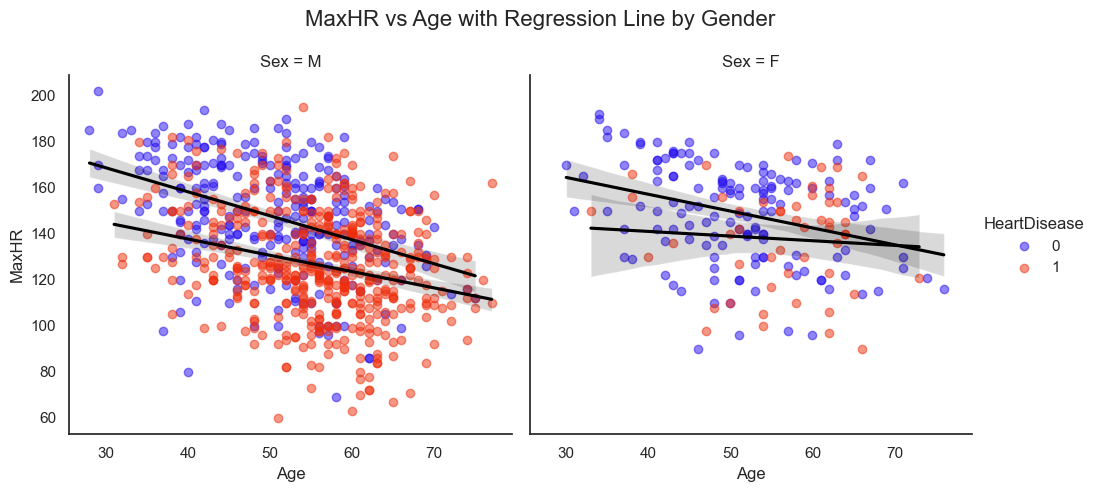

In [3]:

# Convert HeartDisease to string for color legend
df['HeartDisease'] = df['HeartDisease'].astype(str)

# Set the plot style (no gridlines)
sns.set(style="white")

# Create the scatter + regression plot faceted by Sex
g = sns.lmplot(
    data=df,
    x="Age",
    y="MaxHR",
    hue="HeartDisease",
    col="Sex",
    height=5,
    aspect=1,
    palette={ "0": "#230cee", "1": "#ef2e0c" },
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'black'}
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("MaxHR vs Age with Regression Line by Gender", fontsize=16)

plt.show()


Left Plot: Sex = M (Male)
This graph shows the relationship between Age and Maximum Heart Rate (MaxHR) in male patients, with separate regression lines for those with (HeartDisease = 1, red) and without heart disease (HeartDisease = 0, blue).
We observe that MaxHR tends to decrease with age for both groups, and males with heart disease generally have lower MaxHR compared to those without.

Right Plot: Sex = F (Female)
This plot illustrates the same relationship for female patients, again separating those with and without heart disease.
Although the trend is less distinct than in males, females with heart disease also tend to show slightly lower MaxHR across age, suggesting a similar but weaker pattern.


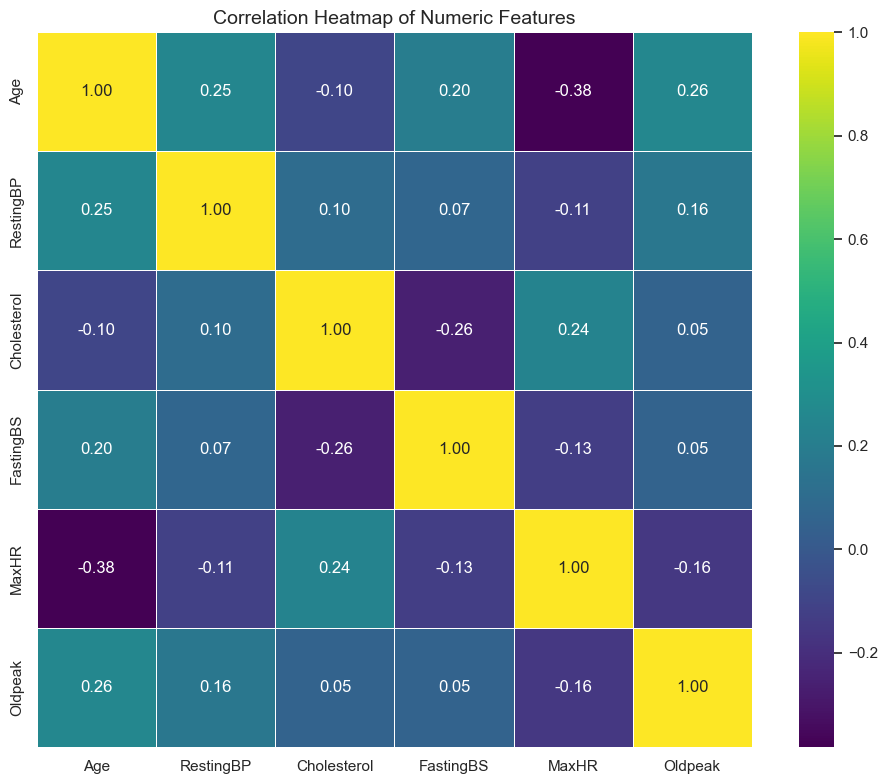

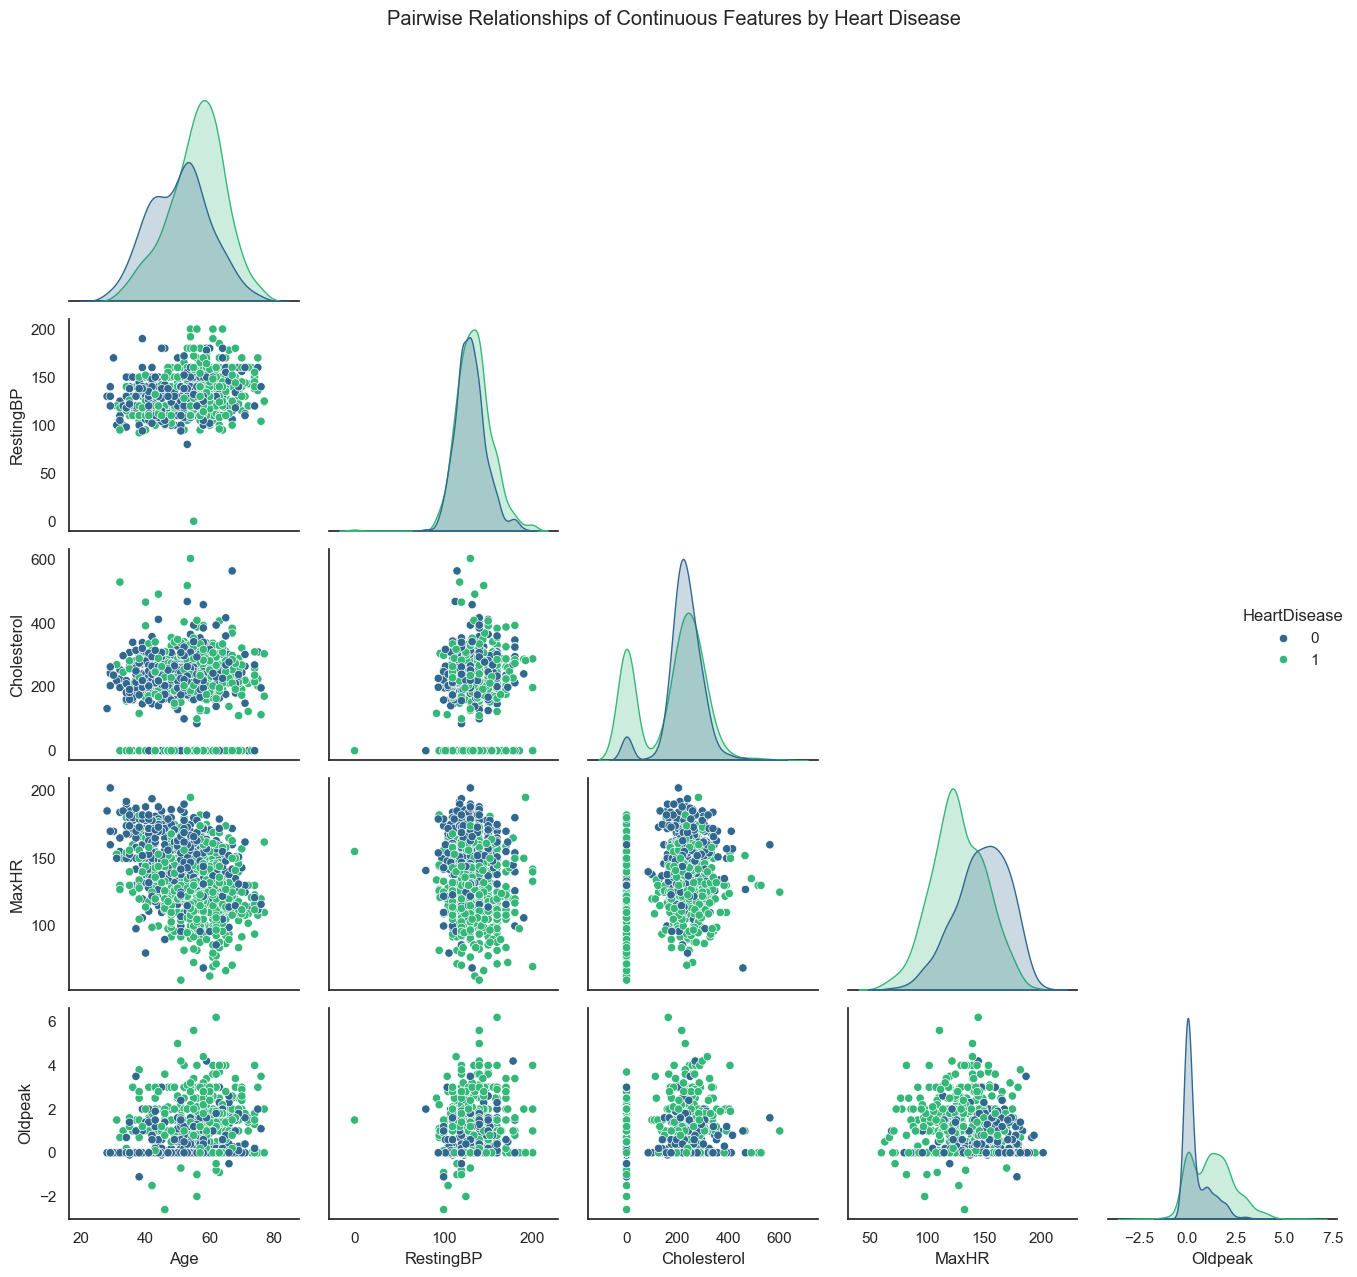

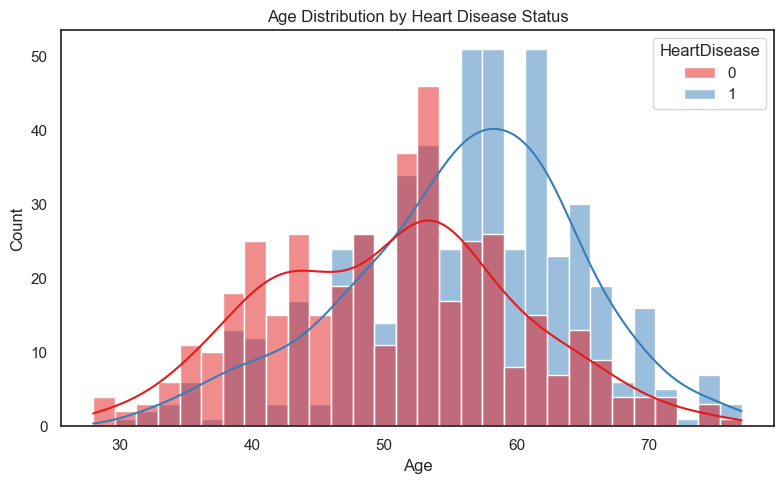

In [4]:
#  Visualizations

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True,
            fmt=".2f",
            cmap='viridis',
            square=True,
            linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

# 2. Pairplot (only continuous features)
continuous_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

sns.pairplot(df[continuous_vars + ['HeartDisease']],
             hue='HeartDisease',
             palette=sns.color_palette("viridis", n_colors=2),
             diag_kind='kde',
             corner=True)
plt.suptitle("Pairwise Relationships of Continuous Features by Heart Disease", y=1.02)
plt.tight_layout()
plt.show()

# 3. histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="HeartDisease", kde=True, bins=30, palette="Set1")
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Correlation Heatmap of Numeric Features

This heatmap shows the pairwise correlation coefficients between all numeric features in the dataset. The Age and MaxHR have a moderately negative correlation (-0.38), suggesting older individuals tend to have lower maximum heart rates.

# Pairwise Relationships of Continuous Features by Heart Disease
The pairplot shows how numeric variables like Age, Cholesterol, and Oldpeak interact, colored by heart disease status. While some features show minimal separation, MaxHR and Oldpeak demonstrate visible differences between individuals with and without heart disease.

# Age Distribution by Heart Disease Status
This histogram compares the age distributions of individuals with and without heart disease. Patients with heart disease (blue) tend to be older on average, with a peak around 60 years, while those without cluster closer to 50.


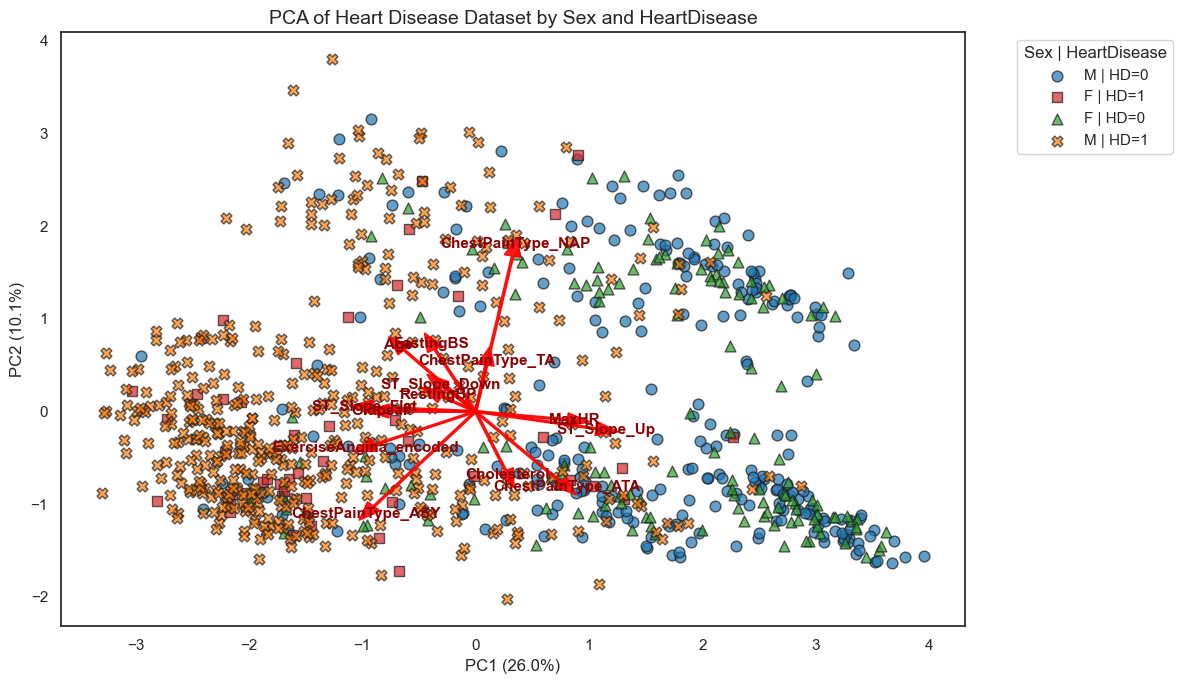

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the data
df = df.copy()

# Encode binary variables
df['Sex_encoded'] = df['Sex'].map({'M': 'M', 'F': 'F'})
df['ExerciseAngina_encoded'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['FastingBS'] = df['FastingBS'].astype(int)  # in case it's boolean

# One-hot encode ChestPainType and ST_Slope
df = pd.get_dummies(df, columns=['ChestPainType', 'ST_Slope'])

# Select features for PCA
features = [
    'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
    'FastingBS', 'ExerciseAngina_encoded',
    'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
    'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'
]
X = df[features]
y = df[['Sex_encoded', 'HeartDisease']]

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
loadings = pca.components_.T

# Create dataframe for plotting
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

# Combine into group labels
pca_df['Group'] = pca_df['Sex_encoded'] + "_HD" + pca_df['HeartDisease'].astype(str)

# Define colors and markers
palette = {
    'M_HD0': '#1f77b4',
    'M_HD1': '#ff7f0e',
    'F_HD0': '#2ca02c',
    'F_HD1': '#d62728'
}
markers = {
    'M_HD0': 'o',
    'M_HD1': 'X',
    'F_HD0': '^',
    'F_HD1': 's'
}

# Axis labels with explained variance
pc1_label = f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)"
pc2_label = f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)"

# Plotting
plt.figure(figsize=(12, 7))
sns.set(style="white")

for group in pca_df['Group'].unique():
    subset = pca_df[pca_df['Group'] == group]
    plt.scatter(
        subset['PC1'], subset['PC2'],
        label=group.replace("_HD", " | HD="),
        alpha=0.7,
        c=palette[group],
        marker=markers[group],
        s=60,
        edgecolors='k'
    )

# Draw arrows
for i, feature in enumerate(features):
    plt.arrow(0, 0,
              loadings[i, 0]*2.5,
              loadings[i, 1]*2.5,
              color='red',
              alpha=0.9,
              width=0.02,
              head_width=0.15,
              head_length=0.2)
    plt.text(loadings[i, 0]*2.7,
             loadings[i, 1]*2.7,
             feature,
             fontsize=11,
             color='darkred',
             fontweight='bold',
             ha='center',
             va='center')

# Labels
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.title("PCA of Heart Disease Dataset by Sex and HeartDisease", fontsize=14)
plt.legend(title="Sex | HeartDisease", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This PCA plot visualizes how patients cluster based on six standardized clinical features, reduced into two principal components that explain over 51% of the total variance.
Each point represents a patient, colored and shaped according to both sex and heart disease status.
The bold red arrows show the direction and strength of contribution from each original feature, e.g., Age and FastingBS contribute strongly to PC1 and PC2.
We observe overlapping distributions between groups, but some mild separation is visible, suggesting that combinations of features like MaxHR, Age, and Oldpeak are partially informative for distinguishing heart disease.


 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

AUC score: 0.930

 Random Forest Results:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

AUC score: 0.932

 Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro 

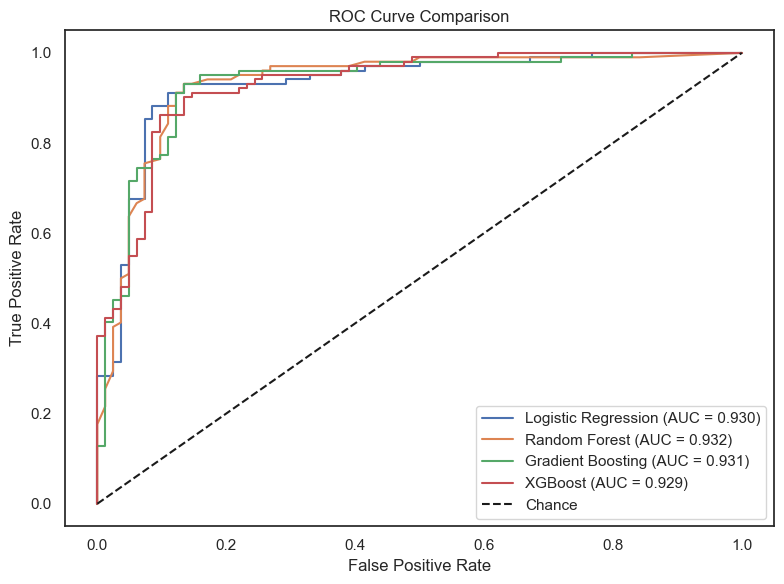

In [17]:

# Load data
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

# Identify columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessors
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize plot
plt.figure(figsize=(8, 6))

# Loop through models
for name, model in models.items():
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Print evaluation metrics
    print(f"\n {name} Results:")
    print(classification_report(y_test, y_pred))
    print(f"AUC score: {roc_auc_score(y_test, y_proba):.3f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.3f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


This ROC curve compares the classification performance of four models: Logistic Regression, Random Forest, Gradient Boosting, and XGBoost, based on their ability to distinguish between patients with and without heart disease.
All models show high performance, with AUC scores above 0.92, indicating strong discriminative power.
Random Forest achieved the highest AUC (0.932), closely followed by Gradient Boosting (0.931) and Logistic Regression (0.930), suggesting that even a linear model performs competitively on this dataset.
The curves rise steeply toward the top-left corner, meaning the models achieve high true positive rates with relatively low false positive rates.

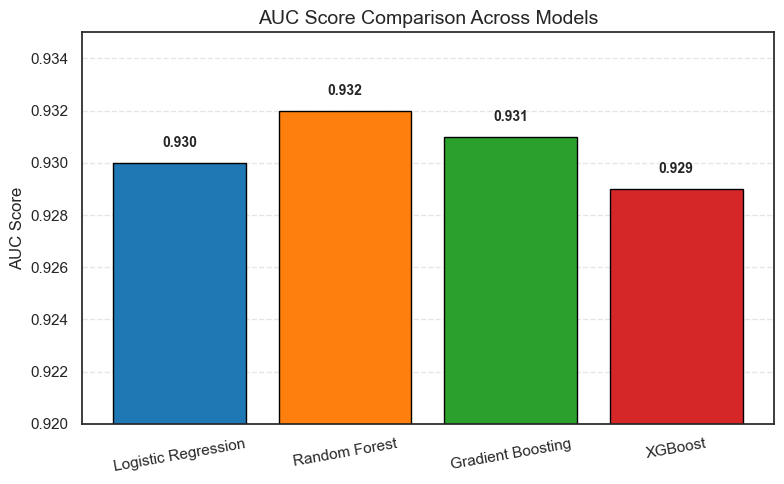

In [18]:
# AUC scores
auc_scores = {
    "Logistic Regression": 0.930,
    "Random Forest": 0.932,
    "Gradient Boosting": 0.931,
    "XGBoost": 0.929
}

# Prepare data
models = list(auc_scores.keys())
scores = list(auc_scores.values())
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=colors, edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0005,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
plt.ylim(0.92, 0.935)
plt.ylabel("AUC Score", fontsize=12)
plt.title("AUC Score Comparison Across Models", fontsize=14)
plt.xticks(rotation=10, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This bar chart compares the AUC scores of four machine learning models used to predict heart disease.
Logistic Regression is a simple, interpretable linear model that performed very well with an AUC of 0.930.
Random Forest and Gradient Boosting are ensemble methods that combine multiple decision trees, and both slightly outperformed the logistic model with AUCs of 0.932 and 0.931 respectively, showing better generalization.
XGBoost, a more advanced boosting algorithm, had the lowest AUC among the four at 0.929, but still demonstrated strong performance.
Overall, all models showed high predictive accuracy, with only minor differences in AUC, indicating that even the simpler models can be highly effective on this dataset.

In [19]:
# STEP 6

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 1. Define X and y before encoding
y = df["HeartFailure"] if "HeartFailure" in df.columns else df["HeartDisease"]
X = df.drop(["HeartFailure"], axis=1) if "HeartFailure" in df.columns else df.drop(["HeartDisease"], axis=1)

# 2. Encode categorical variables (only on X)
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Feature Scaling (Optional for tree models; keep for ML consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Fit Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# 6. Plot Feature Importances
feature_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

fig = px.bar(
    feature_df,
    x="Importance",
    y="Feature",
    orientation='h',
    title="Feature Importances — Random Forest",
    template="plotly_dark",
    color="Importance",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=650)
fig.show()




Logistic Regression Performance:
Accuracy:  0.853
Precision: 0.900
Recall:    0.841
F1 Score:  0.870
ROC AUC:   0.924


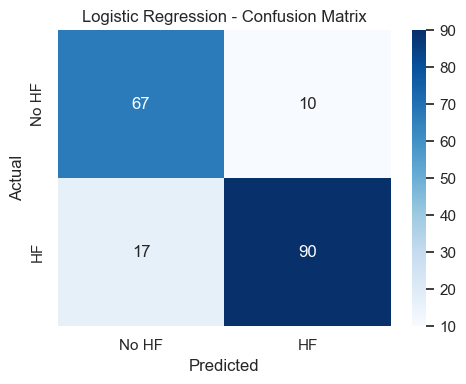


Random Forest Performance:
Accuracy:  0.875
Precision: 0.896
Recall:    0.888
F1 Score:  0.892
ROC AUC:   0.936


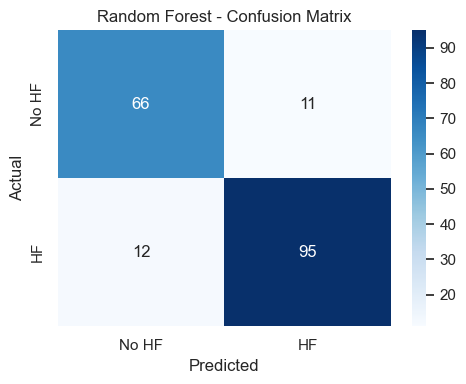


Gradient Boosting Performance:
Accuracy:  0.864
Precision: 0.887
Recall:    0.879
F1 Score:  0.883
ROC AUC:   0.928


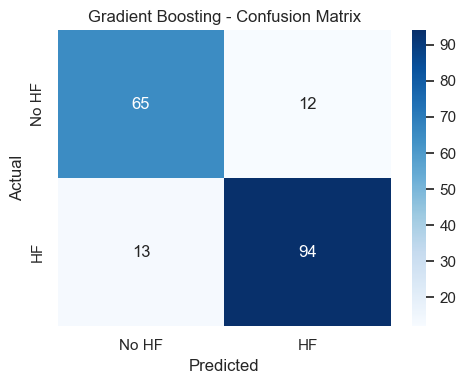


XGBoost Performance:
Accuracy:  0.859
Precision: 0.901
Recall:    0.850
F1 Score:  0.875
ROC AUC:   0.923


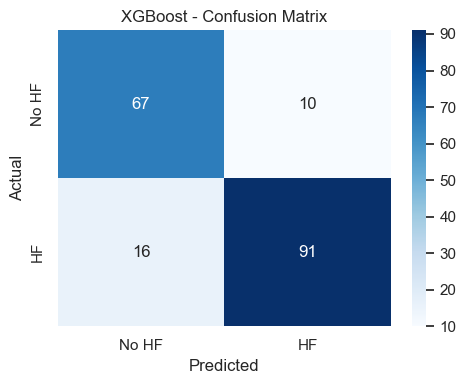

In [21]:
# Confussion matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  


# 1. Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Define target and features
y = df_encoded["HeartFailure"] if "HeartFailure" in df_encoded.columns else df_encoded["HeartDisease"]
X = df_encoded.drop(["HeartFailure", "HeartDisease"], axis=1, errors='ignore')

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 5. Train, predict, evaluate, and ploting of confusion matrices
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    print(f"ROC AUC:   {auc:.3f}")
    
    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No HF", "HF"],
                yticklabels=["No HF", "HF"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



1. Logistic Regression:
This model achieved an accuracy of 85.3% and ROC AUC of 0.924, with 90 true positives and 67 true negatives. It had slightly more false negatives (17) than false positives (10), indicating it missed some heart failure cases.

2. Random Forest:
With the highest ROC AUC of 0.936 and accuracy of 87.5%, Random Forest correctly identified 95 heart failure cases and only misclassified 12. It shows strong performance overall with fewer false negatives than Logistic Regression.

3. Gradient Boosting:
Gradient Boosting delivered balanced metrics (accuracy 86.4%, ROC AUC 0.928), identifying 94 true positives and 65 true negatives. It made 13 false negatives and 12 false positives, performing well though slightly behind Random Forest.

4. XGBoost:
XGBoost achieved 85.9% accuracy and 0.923 ROC AUC, with strong precision (0.901) and a good balance of errors. It correctly predicted 91 heart failure cases, with 16 missed (false negatives), performing comparably to Logistic Regression.

In [22]:
import plotly.express as px
import pandas as pd

# Step 1: Define performance metrics for each model
data = {
    "Model": ["Logistic Regression"] * 5 + ["Random Forest"] * 5 + ["Gradient Boosting"] * 5 + ["XGBoost"] * 5,
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"] * 4,
    "Score": [
        0.853, 0.900, 0.841, 0.870, 0.924,   # Logistic Regression
        0.875, 0.896, 0.888, 0.892, 0.936,   # Random Forest
        0.864, 0.887, 0.879, 0.883, 0.928,   # Gradient Boosting
        0.859, 0.901, 0.850, 0.875, 0.923    # XGBoost
    ]
}

df = pd.DataFrame(data)

# Step 2: Create grouped bar plot
fig = px.bar(
    df,
    x="Metric",
    y="Score",
    color="Model",
    barmode="group",
    text="Score",
    title="Model Performance Comparison",
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Step 3: Customize layout
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    yaxis=dict(range=[0.8, 1.0], title="Score"),
    xaxis=dict(title="Performance Metric"),
    legend_title="Model",
    template="simple_white"
)

fig.show()

